In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) The Problem Statement:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 2) Data Collection

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

In [78]:
df= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

Show Top 5 Records

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of dataset

In [80]:
df.shape

(891, 12)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 Drop the passengerId as it is of no use

In [83]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [84]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fill age with mode of age and embarked with mode of it

In [85]:
df.fillna({'Age':df['Age'].median()},inplace=True)
test.fillna({'Age':test['Age'].median()},inplace=True)
df.fillna({'Embarked':df['Embarked'].mode()[0]},inplace=True)

for cabin we only need class number so we can find out where it is located which is only required

In [86]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [87]:
df['Cabin']=df['Cabin'].str[0]
test['Cabin']=test['Cabin'].str[0]
df['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

filling cabin nan value with mode of cabin

In [88]:
df['Cabin'].fillna('Unknown',inplace=True)
test['Cabin'].fillna('Unknown',inplace=True)

C:\Users\KAPIL MODI\AppData\Local\Temp\ipykernel_17212\3137015098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Cabin'].fillna('Unknown',inplace=True)


In [89]:
test['Cabin'].value_counts()

Cabin
Unknown    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: count, dtype: int64

In [90]:
df['Cabin']

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [91]:
df['Cabin'].value_counts()

Cabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

filling test dataset fare with median fare

In [92]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

C:\Users\KAPIL MODI\AppData\Local\Temp\ipykernel_17212\3907505379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


### 3.2 Check for duplicates

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
test.duplicated().sum()

np.int64(0)

therefore we can see from both test and df there are no duplicated row exists

### 3.3 Check DataType

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [96]:
df.drop(['Name','Ticket'], axis=1, inplace=True)
test.drop(['Name','Ticket'], axis=1, inplace=True)

### 3.4 check number of unique value of each column

In [97]:
df.value_counts()

Survived  Pclass  Sex     Age   SibSp  Parch  Fare      Cabin    Embarked
0         3       male    28.0  0      0      7.8958    Unknown  S           15
                                              8.0500    Unknown  S           12
                                              7.7500    Unknown  Q            8
1         3       female  28.0  0      0      7.7500    Unknown  Q            7
0         2       male    28.0  0      0      0.0000    Unknown  S            6
                                                                             ..
1         3       male    32.0  0      0      8.0500    E        S            1
0         1       male    28.0  0      0      30.6958   Unknown  C            1
1         3       male    39.0  0      0      7.9250    Unknown  S            1
                          44.0  0      0      7.9250    Unknown  S            1
0         1       female  2.0   1      2      151.5500  C        S            1
Name: count, Length: 781, dtype: int64

In [98]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### 3.5 check statistics of dataset

C:\Users\KAPIL MODI\AppData\Local\Temp\ipykernel_17212\2550792289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


<Axes: xlabel='Embarked', ylabel='count'>

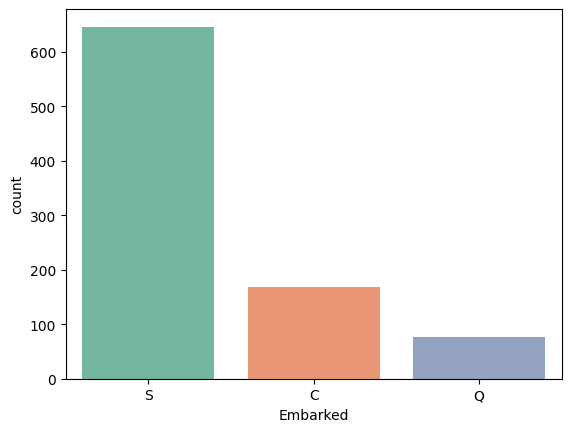

In [99]:
sns.countplot(x='Embarked', data=df, palette='Set2')

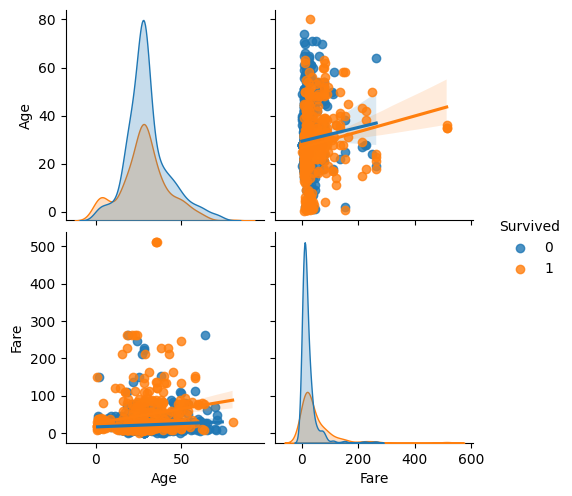

In [100]:
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare'], kind='reg')

From This i can coclude that:
1) Persons with more age can't survive or Young people survived more compared to old people
2) Majority amount of persons survived have paid low Fare

<Axes: xlabel='Cabin', ylabel='count'>

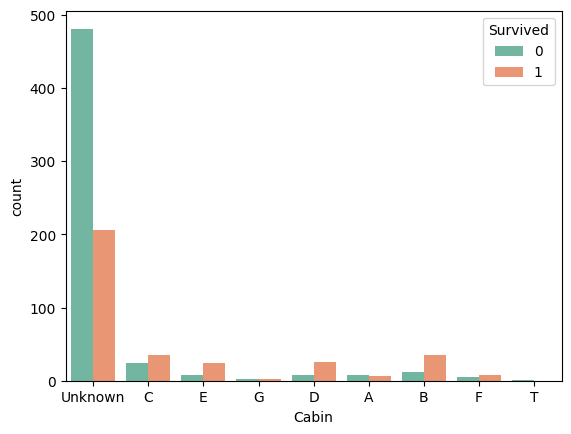

In [101]:
sns.countplot(x='Cabin', data=df, palette='Set2',hue='Survived')


Class B,D,E and C people surived more Unknow category due to large number of dataset having this value survives more and death also

<Axes: xlabel='Pclass', ylabel='count'>

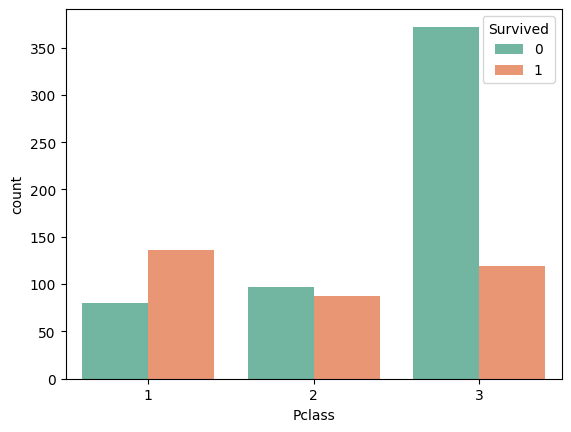

In [102]:
sns.countplot(x='Pclass', data=df, palette='Set2',hue='Survived')

1st class people survived more that 3rd class people 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<Axes: xlabel='Sex', ylabel='count'>

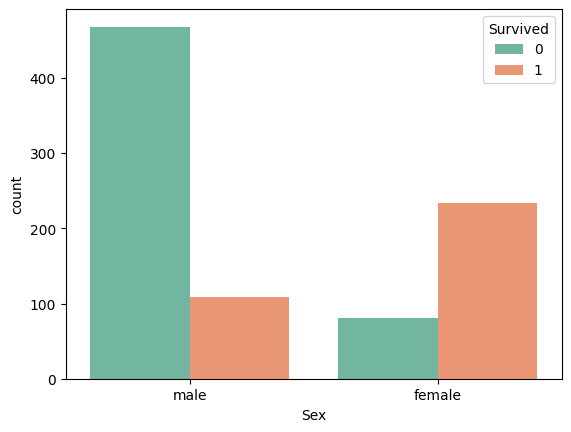

In [104]:
sns.countplot(x='Sex', data=df, palette='Set2',hue='Survived')

Compared to male female survived more

Adding total number of people (sum of sipsb and parch) in df

C:\Users\KAPIL MODI\AppData\Local\Temp\ipykernel_17212\1796044615.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='total', shade=True, color='r',hue='Survived')


<Axes: xlabel='total', ylabel='Density'>

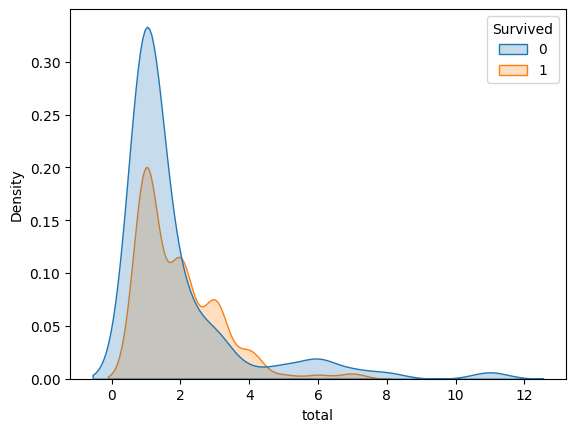

In [105]:
df['total'] = df['SibSp'] + df['Parch']+1
test['total'] = test['SibSp'] + test['Parch']+1
df['FareperPerson'] = df['Fare'] / df['total']
test['FareperPerson'] = test['Fare'] / test['total']
sns.kdeplot(data=df,x='total', shade=True, color='r',hue='Survived')


from this we can see that person with less relative have higher chance of survivability

C:\Users\KAPIL MODI\AppData\Local\Temp\ipykernel_17212\1603046770.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='FareperPerson', shade=True, color='b',hue='Survived')


<Axes: xlabel='FareperPerson', ylabel='Density'>

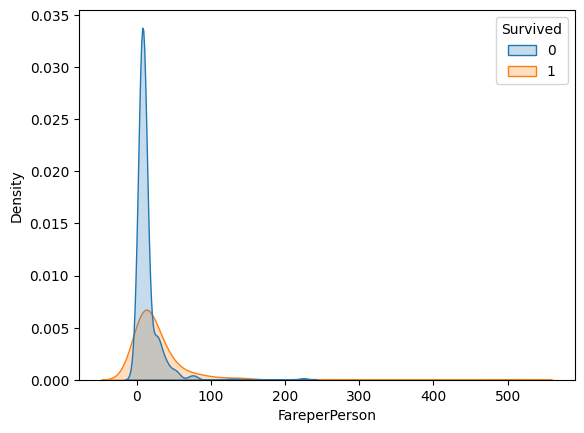

In [120]:
sns.kdeplot(data=df,x='FareperPerson', shade=True, color='b',hue='Survived')

from this we can see that person paid less have higher chance of survival

### 3.6 Check various categories present in the different categorical column

In [106]:
num_features=[features for features in df.columns if df[features].dtype != 'object']
cat_features=[features for features in df.columns if df[features].dtype == 'object']
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'total', 'FareperPerson']
Categorical Features: ['Sex', 'Cabin', 'Embarked']


In [107]:
X_train = df.drop(['Survived'], axis=1)
y_train = df['Survived']

In [108]:
num_features.remove('Survived')

In [109]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

processor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'
)
X_train=processor.fit_transform(X_train)
X_test=test.drop(['PassengerId'], axis=1)
X_test=processor.transform(X_test)

In [110]:
X_train

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

models={
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('lgbm', LGBMClassifier())
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression()),
    'Bagging Classifier': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
    'AdaBoost Classifier': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    'Extra Trees Classifier': ExtraTreesClassifier()
}
model_list={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    f1 = f1_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)
    print('-' * 50)
    print(f"Model: {name}")
    print(f"Confusion Matrix for {name}:\n{cm}\n")
    print(f"Classification Report for {name}:\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_train, y_pred))
    print(f"{name} - F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    model_list[name] = precision
    print("-" * 50)
# Sort models by precision
sorted_models = sorted(model_list.items(), key=lambda x: x[1], reverse=True)
print("Models sorted by Precision:")
for model, precision in sorted_models:
    print(f"{model}: {precision:.4f}")
# Predicting on test data using the best model
best_model_name = sorted_models[0][0]
best_model = models[best_model_name]
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print(f"Submission file created with predictions from {best_model_name}.")

--------------------------------------------------
Model: Decision Tree
Confusion Matrix for Decision Tree:
[[548   1]
 [ 14 328]]

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       1.00      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

Decision Tree - F1 Score: 0.9776, Precision: 0.9970, Recall: 0.9591
--------------------------------------------------
--------------------------------------------------
Model: Random Forest
Confusion Matrix for Random Forest:
[[544   5]
 [ 12 330]]

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.9

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--------------------------------------------------
Model: XGBoost
Confusion Matrix for XGBoost:
[[544   5]
 [ 22 320]]

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       549
           1       0.98      0.94      0.96       342

    accuracy                           0.97       891
   macro avg       0.97      0.96      0.97       891
weighted avg       0.97      0.97      0.97       891

XGBoost - F1 Score: 0.9595, Precision: 0.9846, Recall: 0.9357
--------------------------------------------------
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used 

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--------------------------------------------------
Model: LightGBM
Confusion Matrix for LightGBM:
[[540   9]
 [ 23 319]]

Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       549
           1       0.97      0.93      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891

LightGBM - F1 Score: 0.9522, Precision: 0.9726, Recall: 0.9327
--------------------------------------------------


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--------------------------------------------------
Model: Voting Classifier
Confusion Matrix for Voting Classifier:
[[542   7]
 [ 27 315]]

Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.98      0.92      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891

Voting Classifier - F1 Score: 0.9488, Precision: 0.9783, Recall: 0.9211
--------------------------------------------------


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:4

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--------------------------------------------------
Model: Stacking Classifier
Confusion Matrix for Stacking Classifier:
[[532  17]
 [ 45 297]]

Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       549
           1       0.95      0.87      0.91       342

    accuracy                           0.93       891
   macro avg       0.93      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891

Stacking Classifier - F1 Score: 0.9055, Precision: 0.9459, Recall: 0.8684
--------------------------------------------------
--------------------------------------------------
Model: Bagging Classifier
Confusion Matrix for Bagging Classifier:
[[543   6]
 [ 25 317]]

Classification Report for Bagging Classifier:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       549
           1       0.98      0.93      0.95       342

   

In [114]:
sorted_models

[('Decision Tree', 0.9969604863221885),
 ('AdaBoost Classifier', 0.9969604863221885),
 ('Extra Trees Classifier', 0.9969604863221885),
 ('Random Forest', 0.9850746268656716),
 ('XGBoost', 0.9846153846153847),
 ('Bagging Classifier', 0.9814241486068112),
 ('Voting Classifier', 0.9782608695652174),
 ('LightGBM', 0.9725609756097561),
 ('Stacking Classifier', 0.945859872611465),
 ('Gradient Boosting', 0.9163987138263665)]

### by Voting classifier as by seeing accuracy and precision i felt that in decision tree overfitting can be the case

In [137]:
best_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('ada', AdaBoostClassifier()),
    ('et', ExtraTreesClassifier()),
    ('bag', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)),
    ('stack', StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())),
    ('VotingClassifier',VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
            ('lgbm', LGBMClassifier())
        ],
        voting='soft'
    ))
], voting='soft',weights=[1, 1, 2, 2, 1, 1, 1, 1, 2,3])
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 273, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382889 -> initscore=-0.477303
[LightGBM] [Info] Start training from score -0.477303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [126]:
best_model = models['Stacking Classifier']
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

c:\Users\KAPIL MODI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [122]:
best_model = models['Bagging Classifier']
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [125]:
best_model = models['XGBoost']
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [124]:
best_model = models['Random Forest']
y_test_pred = best_model.predict(X_test)
# Creating submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)